# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import os
import csv

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data_cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [22]:
#Print Starting Log Statement
print(f"Beginning Data Retrieval")
print(f"--------------------------")  

# set up lists to hold reponse info
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lon = []
max_temp = []
wind_speed = []
city_record = []
city_id = []

#Start the API loop initial count at 0
count=0
index_count=1
city_count=1

#Loop through the list of cities and pull the columns for each of the charts
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        city_record.append(city)
        city_id=response['id']
        print(f"Processing Record {city_count} of Set {index_count} | {city}")
        city_count=city_count+1
        if city_count>=50: 
            index_count=index_count+1
            city_count=1
    
# Handle exceptions for a character that is not available in the Star Wars API
    except:
# Append null values
        print("City Not Found. | Skipping {city_record}")
    pass

#Print Ending Log Statement
print(f"--------------------------")
print(f"Data Retrieval Complete")
print(f"--------------------------")  

Beginning Data Retrieval
--------------------------
Processing Record 1 of Set 1 | yellowknife
Processing Record 2 of Set 1 | muros
Processing Record 3 of Set 1 | ostrovnoy
City Not Found. | Skipping {city_record}
Processing Record 4 of Set 1 | atuona
Processing Record 5 of Set 1 | ketchikan
Processing Record 6 of Set 1 | bethel
Processing Record 7 of Set 1 | shadegan
Processing Record 8 of Set 1 | airai
Processing Record 9 of Set 1 | hobart
Processing Record 10 of Set 1 | sao joao da barra
Processing Record 11 of Set 1 | osmaniye
Processing Record 12 of Set 1 | narwar
Processing Record 13 of Set 1 | padang
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | qaanaaq
Processing Record 16 of Set 1 | kapaa
Processing Record 17 of Set 1 | roma
Processing Record 18 of Set 1 | torbay
Processing Record 19 of Set 1 | pevek
Processing Record 20 of Set 1 | new norfolk
Processing Record 21 of Set 1 | guilin
Processing Record 22 of Set 1 | kaspiysk
Processing Record 23 of Set 1

Processing Record 38 of Set 4 | cape town
Processing Record 39 of Set 4 | eenhana
Processing Record 40 of Set 4 | riachao do jacuipe
Processing Record 41 of Set 4 | asau
Processing Record 42 of Set 4 | ambulu
Processing Record 43 of Set 4 | celendin
Processing Record 44 of Set 4 | rorvik
Processing Record 45 of Set 4 | bimbo
Processing Record 46 of Set 4 | torma
Processing Record 47 of Set 4 | cabo san lucas
Processing Record 48 of Set 4 | cockburn town
Processing Record 49 of Set 4 | uray
Processing Record 1 of Set 5 | gravdal
City Not Found. | Skipping {city_record}
Processing Record 2 of Set 5 | kilindoni
Processing Record 3 of Set 5 | tezu
Processing Record 4 of Set 5 | tarusa
Processing Record 5 of Set 5 | banda aceh
Processing Record 6 of Set 5 | darhan
Processing Record 7 of Set 5 | acajutla
Processing Record 8 of Set 5 | constitucion
Processing Record 9 of Set 5 | tucuman
Processing Record 10 of Set 5 | saskylakh
Processing Record 11 of Set 5 | vila velha
Processing Record 12 o

Processing Record 26 of Set 8 | meulaboh
Processing Record 27 of Set 8 | ola
Processing Record 28 of Set 8 | westport
Processing Record 29 of Set 8 | abadiania
Processing Record 30 of Set 8 | guerrero negro
Processing Record 31 of Set 8 | krasnyy klyuch
City Not Found. | Skipping {city_record}
Processing Record 32 of Set 8 | seoul
Processing Record 33 of Set 8 | adeje
Processing Record 34 of Set 8 | mwinilunga
Processing Record 35 of Set 8 | ancud
City Not Found. | Skipping {city_record}
City Not Found. | Skipping {city_record}
Processing Record 36 of Set 8 | qarqin
Processing Record 37 of Set 8 | hovd
City Not Found. | Skipping {city_record}
Processing Record 38 of Set 8 | iqaluit
Processing Record 39 of Set 8 | buraydah
Processing Record 40 of Set 8 | san jose
Processing Record 41 of Set 8 | komsomolskiy
Processing Record 42 of Set 8 | vostok
Processing Record 43 of Set 8 | weyburn
Processing Record 44 of Set 8 | guaratuba
Processing Record 45 of Set 8 | narsaq
Processing Record 46 o

Processing Record 13 of Set 12 | sulangan
Processing Record 14 of Set 12 | pomichna
--------------------------
Data Retrieval Complete
--------------------------


In [35]:
print(len(city_record), len(lat), len(lon), len(max_temp), len(humidity), len(cloudiness), len(wind_speed), len(country), len(date))

553 553 553 553 553 553 553 553 553


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [102]:
# Save as a csv
# Note to avoid any issues later, use encoding="utf-8"
# Convert to DataFrame
main_data = pd.DataFrame({'City': city_record,
                            'Latitude': lat,
                            "Longitude": lon,
                            'Max Temp': max_temp,
                            'Humidity': humidity,
                            'Cloudiness': cloudiness,
                            'Wind Speed': wind_speed,
                            'Country': country,
                            'Date': date})
main_data

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,yellowknife,62.46,-114.35,-5.00,96,98,2.24,CA,1603124573
1,muros,42.78,-9.06,15.56,93,100,8.05,ES,1603124833
2,ostrovnoy,68.05,39.51,1.48,86,98,4.43,RU,1603124833
3,atuona,-9.80,-139.03,25.62,74,6,9.90,PF,1603124834
4,ketchikan,55.34,-131.65,6.00,100,90,3.10,US,1603124834
...,...,...,...,...,...,...,...,...,...
548,nome,64.50,-165.41,4.00,93,90,2.60,US,1603124836
549,cavalcante,-13.80,-47.46,30.99,38,80,2.95,BR,1603124901
550,grindavik,63.84,-22.43,6.00,66,40,3.60,IS,1603124901
551,sulangan,11.14,123.72,27.15,80,100,1.10,PH,1603124901


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [121]:
# Save as a csv
# Note to avoid any issues later, use encoding="utf-8"
main_data.to_csv("output_data_cities.csv", encoding="utf-8", index=True)

In [104]:
#  Get the indices of cities that have humidity over 100%.
humid_city_data_df=main_data.loc[main_data["Humidity"]==100]
humid_city_data_df


,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
4,ketchikan,55.34,-131.65,6.00,100,90,3.10,US,1603124834
29,fortuna,40.60,-124.16,12.78,100,90,2.60,US,1603124837
40,esperance,-33.87,121.90,14.00,100,90,2.60,AU,1603124838
89,jamestown,42.10,-79.24,10.56,100,90,1.50,US,1603124487
113,christchurch,-43.53,172.63,9.44,100,94,1.50,NZ,1603124849
153,balagunan,7.49,125.52,26.00,100,75,1.00,PH,1603124853
217,dispur,26.14,91.79,28.00,100,75,1.50,IN,1603124861
274,hasaki,35.73,140.83,12.22,100,75,3.10,JP,1603124867
284,songkhla,6.83,100.67,26.00,100,40,0.65,TH,1603124869
302,lompoc,34.64,-120.46,12.00,100,90,2.61,US,1603124599


In [105]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data_df=main_data.loc[main_data["Humidity"]<100]
clean_city_data_df

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,yellowknife,62.46,-114.35,-5.00,96,98,2.24,CA,1603124573
1,muros,42.78,-9.06,15.56,93,100,8.05,ES,1603124833
2,ostrovnoy,68.05,39.51,1.48,86,98,4.43,RU,1603124833
3,atuona,-9.80,-139.03,25.62,74,6,9.90,PF,1603124834
5,bethel,41.37,-73.41,16.11,72,90,2.53,US,1603124834
...,...,...,...,...,...,...,...,...,...
548,nome,64.50,-165.41,4.00,93,90,2.60,US,1603124836
549,cavalcante,-13.80,-47.46,30.99,38,80,2.95,BR,1603124901
550,grindavik,63.84,-22.43,6.00,66,40,3.60,IS,1603124901
551,sulangan,11.14,123.72,27.15,80,100,1.10,PH,1603124901


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

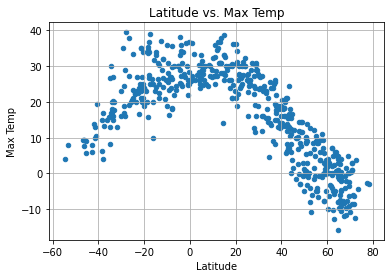

In [95]:
clean_city_data_df.plot(kind="scatter", x="Latitude", y="Max Temp", grid=True,
               title="Latitude vs. Max Temp")
plt.show()

## Latitude vs. Humidity Plot

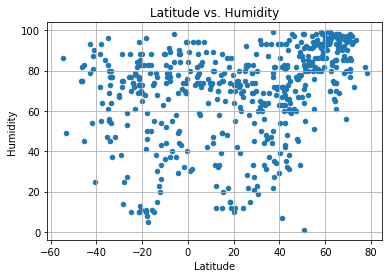

In [96]:
clean_city_data_df.plot(kind="scatter", x="Latitude", y="Humidity", grid=True,
               title="Latitude vs. Humidity")
plt.show()

## Latitude vs. Cloudiness Plot

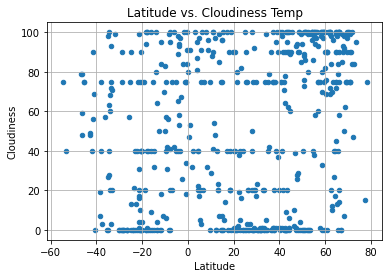

In [97]:
clean_city_data_df.plot(kind="scatter", x="Latitude", y="Cloudiness", grid=True,
               title="Latitude vs. Cloudiness Temp")
plt.show()

## Latitude vs. Wind Speed Plot

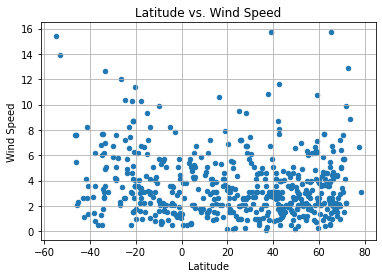

In [98]:
clean_city_data_df.plot(kind="scatter", x="Latitude", y="Wind Speed", grid=True,
               title="Latitude vs. Wind Speed")
plt.show()

## Linear Regression

In [99]:
def linear_regression_plot(x_values, y_values, title, coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,coordinates,fontsize=15,color="red")
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r value is: {round(rvalue,2)}")
    plt.show()

In [109]:
northern_df=clean_city_data_df.loc[clean_city_data_df["Latitude"]>=0]
northern_df

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,yellowknife,62.46,-114.35,-5.00,96,98,2.24,CA,1603124573
1,muros,42.78,-9.06,15.56,93,100,8.05,ES,1603124833
2,ostrovnoy,68.05,39.51,1.48,86,98,4.43,RU,1603124833
5,bethel,41.37,-73.41,16.11,72,90,2.53,US,1603124834
6,shadegan,30.65,48.66,27.00,19,0,3.10,IR,1603124834
...,...,...,...,...,...,...,...,...,...
547,mao,39.89,4.27,19.00,63,20,5.10,ES,1603124901
548,nome,64.50,-165.41,4.00,93,90,2.60,US,1603124836
550,grindavik,63.84,-22.43,6.00,66,40,3.60,IS,1603124901
551,sulangan,11.14,123.72,27.15,80,100,1.10,PH,1603124901


In [110]:
southern_df=clean_city_data_df.loc[clean_city_data_df["Latitude"]<0]
southern_df

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
3,atuona,-9.80,-139.03,25.62,74,6,9.90,PF,1603124834
7,airai,-8.93,125.41,16.30,77,42,0.77,TL,1603124598
8,hobart,-42.88,147.33,8.00,93,49,2.60,AU,1603124721
9,sao joao da barra,-21.64,-41.05,25.00,69,75,10.30,BR,1603124835
12,padang,-0.95,100.35,26.11,74,18,1.94,ID,1603124835
...,...,...,...,...,...,...,...,...,...
535,oranjemund,-28.55,16.43,16.13,75,0,7.58,NA,1603124899
538,caconda,-13.73,15.07,30.40,15,64,3.09,AO,1603124899
541,big bend,-26.82,31.93,27.39,59,0,2.29,SZ,1603124882
546,kavieng,-2.57,150.80,27.93,71,26,1.25,PG,1603124900


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r value is: -0.9


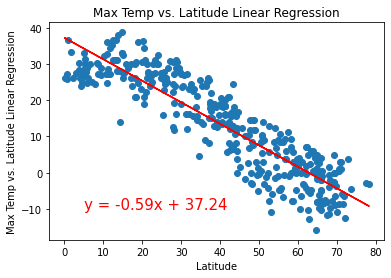

In [111]:
linear_regression_plot(northern_df["Latitude"],northern_df["Max Temp"],"Max Temp vs. Latitude Linear Regression",(5,-10))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r value is: 0.67


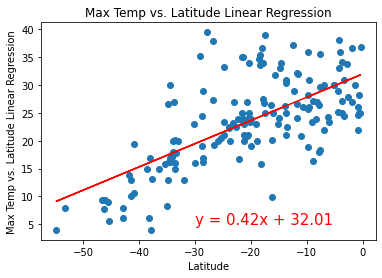

In [112]:
linear_regression_plot(southern_df["Latitude"],southern_df["Max Temp"],"Max Temp vs. Latitude Linear Regression",(-30,5))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r value is: 0.42


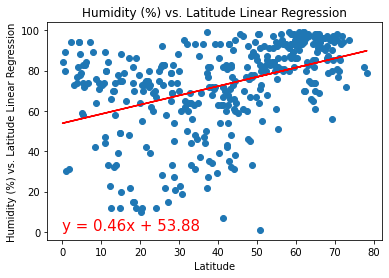

In [113]:
linear_regression_plot(northern_df["Latitude"],northern_df["Humidity"],"Humidity (%) vs. Latitude Linear Regression",(0,1))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r value is: -0.09


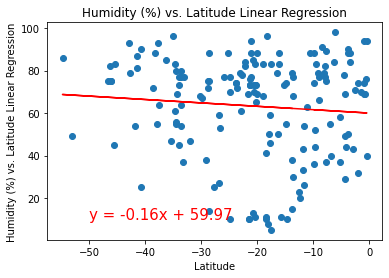

In [114]:
linear_regression_plot(southern_df["Latitude"],southern_df["Humidity"],"Humidity (%) vs. Latitude Linear Regression",(-50,10))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r value is: 0.29


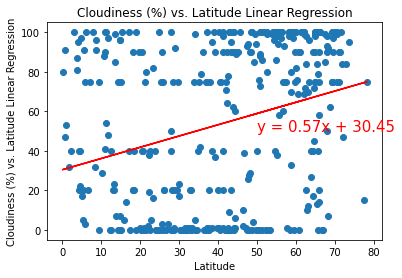

In [115]:
linear_regression_plot(northern_df["Latitude"],northern_df["Cloudiness"],"Cloudiness (%) vs. Latitude Linear Regression",(50,50))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r value is: 0.12


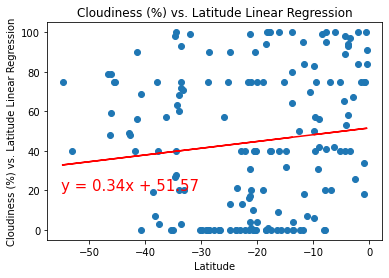

In [116]:
linear_regression_plot(southern_df["Latitude"],southern_df["Cloudiness"],"Cloudiness (%) vs. Latitude Linear Regression",(-55,20))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r value is: 0.06


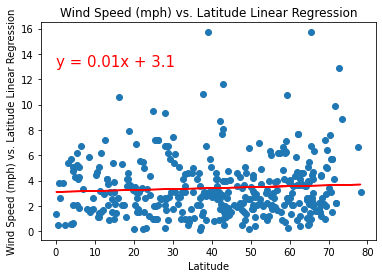

In [117]:
linear_regression_plot(northern_df["Latitude"],northern_df["Wind Speed"],"Wind Speed (mph) vs. Latitude Linear Regression",(0,13))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r value is: -0.29


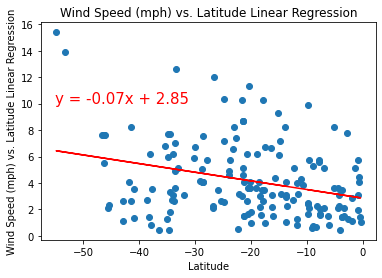

In [118]:
linear_regression_plot(southern_df["Latitude"],southern_df["Wind Speed"],"Wind Speed (mph) vs. Latitude Linear Regression",(-55,10))